In [1]:
import torch
import math
import torch.nn as nn
import torchviz
# 配置
device = torch.device('cuda')
dtype = torch.float

In [22]:
## 例1：机制示例  
class Pow(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, n):
        t = torch.ones_like(x)
        for i in range(n):
            t *= x
        ctx.save_for_backward(x)
        ctx.constant = n
        return t

    @staticmethod
    def backward(ctx, grad_out):
        x, = ctx.saved_tensors
        n = ctx.constant
        r = torch.ones_like(x)
        for i in range(n-1):
            r *= x
        return grad_out * n * r, None

In [31]:
class Square(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x.pow(2)

    @staticmethod
    def backward(ctx, grad_out):
        x, = ctx.saved_tensors
        return grad_out * 2 * x.pow(1), None

tensor(2., grad_fn=<MulBackward0>)


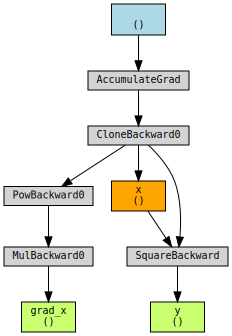

In [32]:
x = torch.tensor(1., requires_grad=True).clone()
y = Square.apply(x)

# 这里要设create_graph=True，否则后面torchviz画图会报错：
# RuntimeError: Trying to backward through the graph a second time
# (or directly access saved tensors after they have already been freed).
grad_x, = torch.autograd.grad(y, x, create_graph=True) 
print(grad_x)

# 完整的graph
torchviz.make_dot((grad_x, x, y), {'grad_x':grad_x, 'x':x, 'y':y})
